---
# 서울시 구별 CCTV 현황분석

### 1. 데이터 수집 

+ https://opengov.seoul.go.kr
    - 구글에서 "서울시 cctv 현황" 검색을 통해 데이터 수집
    - cctv.csv
    
+ https://data.seoul.go.kr/
    - 구글에서 "서울시 인구" 검색을 통해 데이터 수집
    - Report.xls

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

In [3]:
# CCTV 자료 불러오기
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [4]:
# 인구수 자료 불러오기
pop_seoul = pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N", header=2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 2. 탐색적 데이터 분석 (EDA) 과 전처리

####  2-1 컬럼 이름 변경 

In [5]:
# CCTV 자료에서 기관명이라는 컬럼을 "구별"로 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"}, inplace=True) 
# inplace를 하지 않으면 원본은 바뀌지 않음
cctv_seoul

#인구수 자료에서는 컬럼명을 각각 구별, 인구수, 한국인, 외국인, 고령자로 변경 
pop_seoul.rename(columns={pop_seoul.columns[0]:"구별", 
                          pop_seoul.columns[1]:"인구수",
                         pop_seoul.columns[2]:"한국인",
                         pop_seoul.columns[3]:"외국인",
                         pop_seoul.columns[4]:"고령자"}, inplace=True) 
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


#### 2-2. 어느 구가 가장 CCTV가 많이 설치되었는가? 가장 적은 곳은 어디인가?

In [6]:
# CCTV 데이터에서 소계를 기준으로 정렬
cctv_seoul.sort_values(by="소계", ascending=False).head() #가장 많은 곳
cctv_seoul.sort_values(by="소계", ascending=True).head()  #가장 적은 곳 

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [26]:
### CCTV의 설치 증가율 
### CCTV 설치 연도별 증가율 구해서 "최근 증가율" 컬럼을 새로 추가
### ((2014 + 2015+ 2016) / 2013년도 이전 )*100
cctv_seoul["최근 증가율"] = ((cctv_seoul["2014년"]+cctv_seoul["2015년"]+ \
                         cctv_seoul["2016년"])/cctv_seoul["2013년도 이전"])*100
cctv_seoul
#cctv_seoul.sort_values(by="최근 증가율", ascending=False).head() #가장 많이 증가한 곳
#cctv_seoul.sort_values(by="최근 증가율", ascending=True).head()  #가장 적게 증가한 곳 
cctv_seoul.sort_values(by="최근 증가율", ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


#### 2-3 어느 구가 가장 인구수가 많은가?

In [7]:
# 필요 없는 행(서울시 전체 합계) 삭제 : del, drop
pop_seoul.drop([0], inplace=True)
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [8]:
# 구별 데이터의 중복이나 결측치 등을 확인
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()] 


,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [9]:
pop_seoul.drop([26], inplace=True)

In [10]:
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()] 

,구별,인구수,한국인,외국인,고령자


In [11]:
# 인구수 확인 
pop_seoul.sort_values(by = "인구수", ascending=True)
pop_seoul.sort_values(by = "인구수", ascending=False)

pop_seoul.sort_values(by = "외국인", ascending=True)
pop_seoul.sort_values(by = "외국인", ascending=False)

pop_seoul.sort_values(by = "고령자", ascending=True)
pop_seoul.sort_values(by = "고령자", ascending=False)

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
12,은평구,490253,485902,4351,75535
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807
8,성북구,453902,442226,11676,66896
23,강남구,557865,552976,4889,65859
7,중랑구,411552,406868,4684,59992
17,구로구,440396,408369,32027,59838
20,동작구,406715,394353,12362,57711


In [12]:
# 외국인 비율, 고령자 비율 컬럼추가
pop_seoul["외국인비율"] = (pop_seoul["외국인"]/pop_seoul["인구수"])*100
pop_seoul["고령자비율"] = (pop_seoul["고령자"]/pop_seoul["인구수"])*100

pop_seoul.sort_values(by = "외국인비율", ascending=True)
pop_seoul.sort_values(by = "외국인비율", ascending=False)

pop_seoul.sort_values(by = "고령자비율", ascending=True)
pop_seoul.sort_values(by = "고령자비율", ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880
12,은평구,490253,485902,4351,75535,0.887501,15.407351
13,서대문구,324871,312311,12560,49645,3.866150,15.281450
3,용산구,245411,229909,15502,37238,6.316750,15.173729
8,성북구,453902,442226,11676,66896,2.572361,14.737983
7,중랑구,411552,406868,4684,59992,1.138131,14.577016


#### 2-4 인구 대비 CCTV 설치현황을 알아보자

In [13]:
# CCTV 데이터와 인구수 데이터를 합치기
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,522292,504445,17847,70807,3.417054,13.556976


In [14]:
# 필요없는 컬럼 제거 : 2013년도 이전, 2014년, 2015년, 2016년 
# 더이상 년도별 CCTV설치 갯수는 필요없기 때문에 삭제

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [15]:
data_result

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,522292,504445,17847,70807,3.417054,13.556976
5,광진구,878,371671,357149,14522,44470,3.907219,11.964883
6,구로구,1884,440396,408369,32027,59838,7.272319,13.587317
7,금천구,1348,253344,234238,19106,34640,7.541525,13.673109
8,노원구,1566,555803,551902,3901,75081,0.701867,13.508563
9,도봉구,825,345041,342861,2180,54293,0.631809,15.735231


In [16]:
# 구별 컬럼을 인덱스로 변경
data_result.set_index("구별", inplace=True)
data_result

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,438225,434027,4198,56983,0.957955,13.003138
강북구,831,327511,323862,3649,57002,1.114161,17.404606
강서구,911,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,522292,504445,17847,70807,3.417054,13.556976
광진구,878,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,555803,551902,3901,75081,0.701867,13.508563


In [17]:
# CCTV의 갯수(소계) 인구 데이터 중 어느 변수와 더 관계가 있는지 확인
# numpy에 np.corrcoef() : 상관계수 - 1~1 

print(np.corrcoef(data_result["고령자비율"], data_result["소계"])) 
print(np.corrcoef(data_result["외국인비율"], data_result["소계"])) 
print(np.corrcoef(data_result["인구수"], data_result["소계"])) 

[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [18]:
data_result.sort_values(by="소계", ascending=False).head()
data_result.sort_values(by="인구수", ascending=False).head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
송파구,1081,671994,665282,6712,77978,0.998818,11.603973
강서구,911,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,522292,504445,17847,70807,3.417054,13.556976


### 3. 시각화

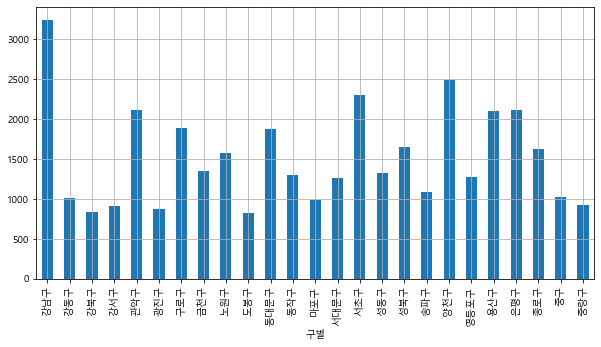

In [19]:
#CCTV가 많이 설치된 구별로 그래프 그리기 (막대 그래프)
data_result["소계"].plot(kind="bar")
data_result["소계"].plot.bar()

data_result["소계"].plot(kind="bar", figsize=(10, 5), grid=True) # grid 눈금표시 /figsize_그래프 사이즈

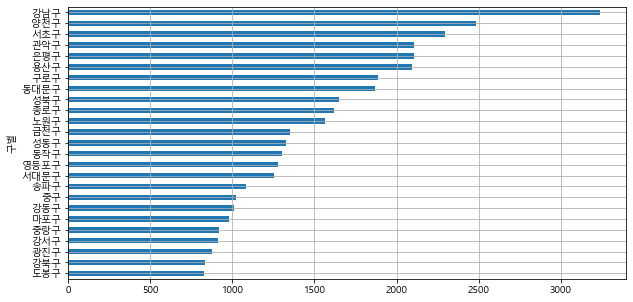

In [20]:
#data_result["소계"].plot(kind="barh", figsize=(10, 5), grid=True)
data_result["소계"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)  #값으로 정렬

In [21]:
# CCTV비율 컬럼 추가(소계/인구수 * 100)
data_result["cctv비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,
강남구,3238,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,522292,504445,17847,70807,3.417054,13.556976,0.403797


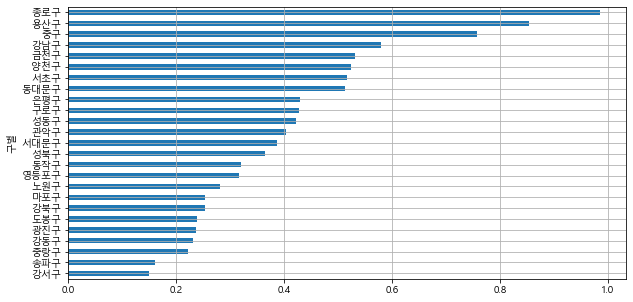

In [22]:
# 인구수 대비 cctv가 많이 설치된 지역 
data_result["cctv비율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)  #값으로 정렬

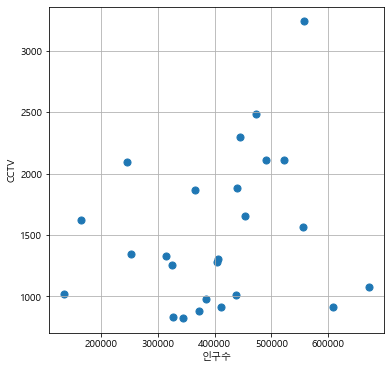

In [23]:
## CCTV의 설치 대수와 인구수의 관계를 산포도로 확인

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [33]:
# 회귀식 ax + b
# poly1d = 1차 방정식 함수(np)

a = np.poly1d([1, 2])  #[회귀계수, 절편]
print(a)

# 2차 방정식도 가능
b = np.poly1d([1, 2, 3]) # 1x제곱 + 2x + 3
print(b)

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 3, 5, 6, 7, 7, 10, 11])
c = np.polyfit(X, y, 1)
print(c)

d = np.poly1d(c)
print(d)

 
1 x + 2
   2
1 x + 2 x + 3
[1.11666667 0.41666667]
 
1.117 x + 0.4167


[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


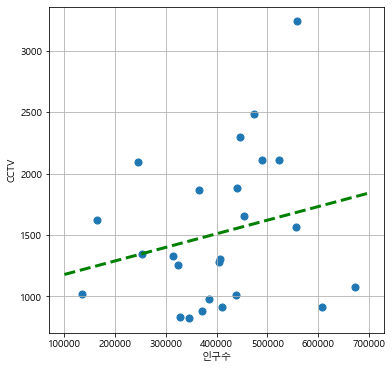

In [41]:
# 회귀선 작성(y = ax + b)

#np.ployfit() # 최소제곱법을 이용하여 오차가 가장 작은 값(회귀계수=직선의 기울기)을 찾아주는 함수
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
print(fp1)

# 방정식으로 만들기  
f1 = np.poly1d(fp1) 
print(f1)

fx = np.linspace(100000, 700000, 100)

# 그래프
plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
#plt.plot(fx, f1[0]*fx + fp1[1], lw=3, color="g", ls="dashed")
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

# 여기서 회귀선은 의미없음

In [42]:
# 각 데이터의 오차(잔차)를 구해서 구 이름을 출력
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,
강남구,3238,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
강동구,1010,438225,434027,4198,56983,0.957955,13.003138,0.230475,-542.582309
강북구,831,327511,323862,3649,57002,1.114161,17.404606,0.253732,-599.318223
강서구,911,608361,601696,6665,77381,1.095567,12.719586,0.149747,-829.467513
관악구,2109,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517


In [43]:
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head(10)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,
강남구,3238,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
용산구,2096,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
은평구,2108,490253,485902,4351,75535,0.887501,15.407351,0.429982,497.961942
관악구,2109,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517
동대문구,1870,364962,349308,15654,56284,4.289214,15.421880,0.512382,398.323753
종로구,1619,164348,154549,9799,26429,5.962348,16.081121,0.985105,368.866533
구로구,1884,440396,408369,32027,59838,7.272319,13.587317,0.427797,329.020205


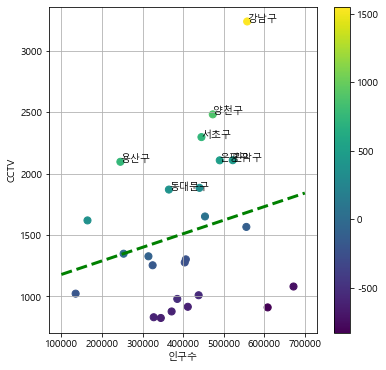

In [51]:
# 그래프
plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"])
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()

# 회귀선에서 멀리 떨어져있는 구 이름 7개만 
for n in range(7):
    plt.text(df_sort["인구수"][n], df_sort["소계"][n], df_sort.index[n], fontsize=10)


In [56]:
# 최종 결과물을 파일로 저장
df_sort.to_csv("data/seoul/cctv_result.csv", sep=",", encoding = "utf-8")